<a href="https://colab.research.google.com/github/FariaJahan63/Dengue_Forecasting/blob/master/Time__Series__Dengue_Forecasting_Sarima_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
df=pd.read_csv("/content/DengueAndClimateBangladesh.csv")
print(df.head())

   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
0  2008      1  12.993929  25.059539  78.824885  1.286636       0
1  2008      2  13.658286  26.383448  72.602956  0.687685       0
2  2008      3  20.411250  31.367558  76.903226  0.974194       0
3  2008      4  22.771889  34.031619  73.943810  0.980952       0
4  2008      5  23.945625  34.171060  77.360369  7.021198       0


In [ ]:
df.describe()

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,2013.089552,6.425373,20.943415,30.848480,80.115577,27.840582,211.582090
std,3.233896,3.493015,4.830249,2.851090,5.253859,98.393795,451.214606
min,2008.000000,1.000000,10.597946,23.522676,67.548387,0.000000,0.000000
25%,2010.000000,3.000000,16.404490,29.277935,77.188214,0.547765,0.000000
50%,2013.000000,6.000000,22.935495,31.987028,80.093810,6.008095,36.000000
75%,2016.000000,9.000000,25.278970,32.676912,84.778111,12.774048,187.000000
max,2019.000000,12.000000,26.485821,35.769333,88.384071,689.161290,3087.000000


<Axes: >

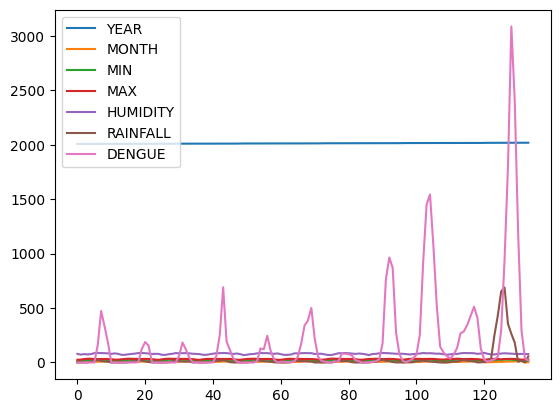

In [ ]:
df.plot()

**T1**

Arima Model (https://www.youtube.com/watch?v=-aCF0_wfVwY&t=122s)

**testing for stationary**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['DENGUE'])

**Step 1: Check for stationarity of time series**

Checking unit root for stationary and non stationary.

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is stationary

In [ ]:
#H0 : Stationary
#H1:Non stationary
def adfuller_test(DENGUE):
  result=adfuller(DENGUE)
  labels=['ADF test statistic','p-value','#Lags Used','Number of observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value) )
  if result[1]<=0.05:
    print("strong evidence againt null hypothsis H0,reject all the null hypothesis.")
  else:
    print("weak evidence against null hypothesis.Time series has a unit root,indicating it is non-stationary")

In [ ]:
adfuller_test(df['DENGUE'])

ADF test statistic : -0.6820036298856035
p-value : 0.851356098408988
#Lags Used : 9
Number of observations Used : 124
weak evidence against null hypothesis.Time series has a unit root,indicating it is non-stationary


**Transform to stationary: differencing**

In [ ]:
df['DENGUE first difference']=df['DENGUE']-df['DENGUE'].shift(1)
df['Seasonal first difference']=df['DENGUE']-df['DENGUE'].shift(12)

In [ ]:
df.head(20)

,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE,DENGUE first difference,Seasonal first difference
0,2008,1,12.993929,25.059539,78.824885,1.286636,0,NaN,NaN
1,2008,2,13.658286,26.383448,72.602956,0.687685,0,0.0,NaN
2,2008,3,20.411250,31.367558,76.903226,0.974194,0,0.0,NaN
3,2008,4,22.771889,34.031619,73.943810,0.980952,0,0.0,NaN
4,2008,5,23.945625,34.171060,77.360369,7.021198,0,0.0,NaN
5,2008,6,24.959447,31.764118,85.682857,14.016190,0,0.0,NaN
6,2008,7,25.069554,31.133180,88.057143,22.565899,160,160.0,NaN
7,2008,8,25.278214,31.657972,86.810138,13.908756,473,313.0,NaN
8,2008,9,25.075392,32.367429,85.155238,9.107619,334,-139.0,NaN
9,2008,10,22.945000,31.546267,83.882028,7.332719,184,-150.0,NaN


In [ ]:
adfuller_test(df['Seasonal first difference'].dropna())

ADF test statistic : -3.751618472937028
p-value : 0.003442975339034427
#Lags Used : 12
Number of observations Used : 109
strong evidence againt null hypothsis H0,reject all the null hypothesis.


<Axes: >

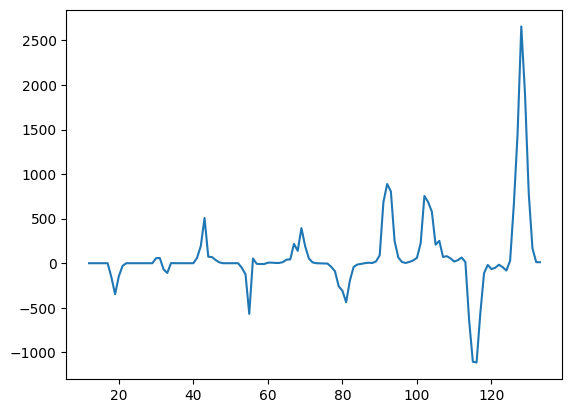

In [ ]:
df['Seasonal first difference'].plot()

**Auto Regressive Model**

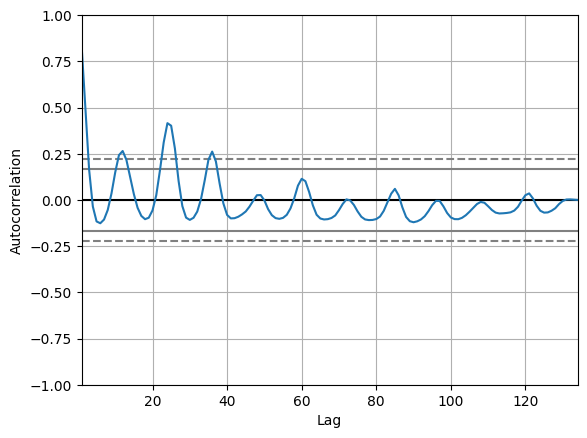

In [ ]:
from pandas import plotting

# Use the desired plotting function from the 'plotting' module
plotting.autocorrelation_plot(df['DENGUE'])
plt.show()

In [ ]:
import statsmodels.tsa.stattools as smt

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

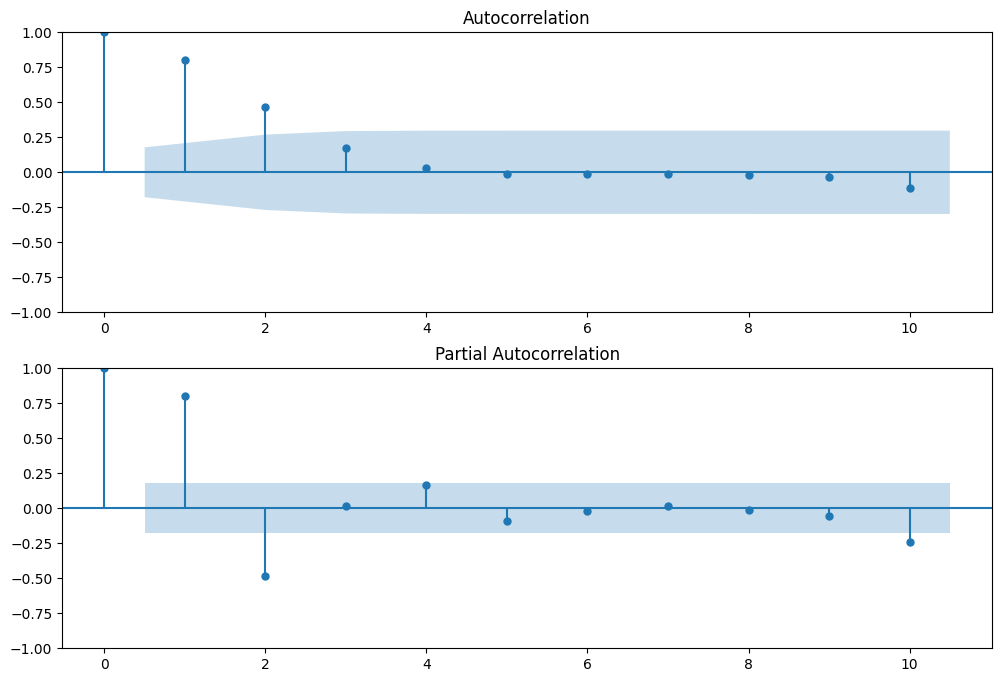

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['Seasonal first difference'].iloc[13:], lags=10, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df['Seasonal first difference'].iloc[13:], lags=10, ax=ax2)

**Step 2: Determine ARIMA models parameters p, q Step 3: Fit the ARIMA model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Reshape df_train into a univariate time series
endog = df.stack()

# Create the ARIMA model
model = ARIMA(endog, order=(2,1,0))

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1193
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -9643.709
Date:                Fri, 05 Jul 2024   AIC                          19293.418
Time:                        14:37:41   BIC                          19308.668
Sample:                             0   HQIC                         19299.164
                               - 1193                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6878      0.030    -22.663      0.000      -0.747      -0.628
ar.L2         -0.3722      0.029    -12.727      0.000      -0.430      -0.315
sigma2      6.222e+05   1.85e+04     33.708      0.0

**Step 4: Make time series predictions**

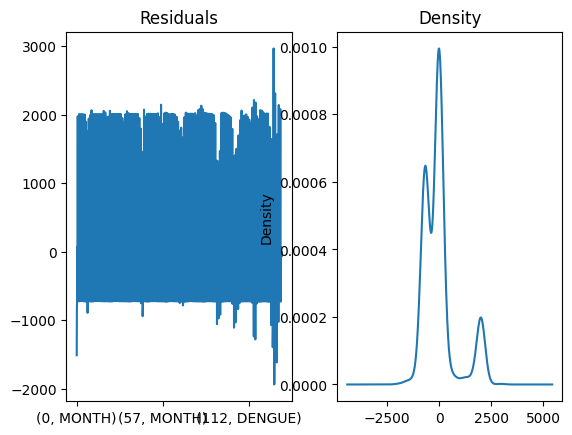

In [ ]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

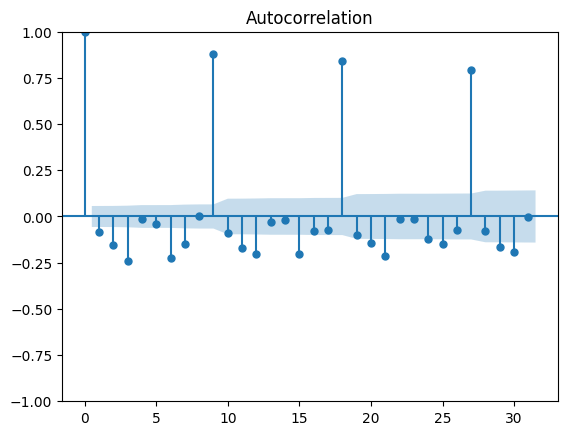

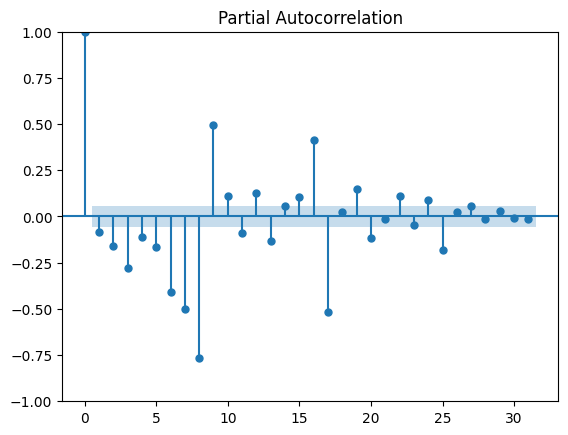

In [ ]:
import statsmodels.api as sm

acf_res = sm.graphics.tsa.plot_acf(residuals)
pacf_res = sm.graphics.tsa.plot_pacf(residuals)

**Optional: Auto-fit the ARIMA model**

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
# Load data into the DataFrame
df = pd.read_csv("/content/DengueAndClimateBangladesh.csv")

# Fit the auto_arima model
auto_arima = pm.auto_arima(df.values.ravel(), stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 1, 4), scoring_args={}, suppress_warnings=True)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  938
Model:               SARIMAX(1, 1, 4)   Log Likelihood               -7411.244
Date:                Fri, 05 Jul 2024   AIC                          14836.489
Time:                        14:40:40   BIC                          14870.388
Sample:                             0   HQIC                         14849.413
                                - 938                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1054     10.293      0.010      0.992     -20.068      20.279
ar.L1         -0.4686      0.147     -3.177      0.001      -0.758      -0.180
ma.L1         -0.5961      0.051    -11.595      0.000      -0.697      -0.495
ma.L2         -0.6054      0.065     -9.282      0.000      -0.733      -0.478
ma.L3         -0.5826      0.064     -9.078      0.000      -0.708      -0.457
ma.L4          0.9569      0.050     19.278      0.000       0.860       1.054
sigma2      8.615e+05   7.21e+04     11.953      0.000     7.2e+05       1e+06
===================================================================================
Ljung-Box (L1) (Q):                  11.82   Jarque-Bera (JB):                37.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.45
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Step 5: Evaluate model predictions**

<Axes: >

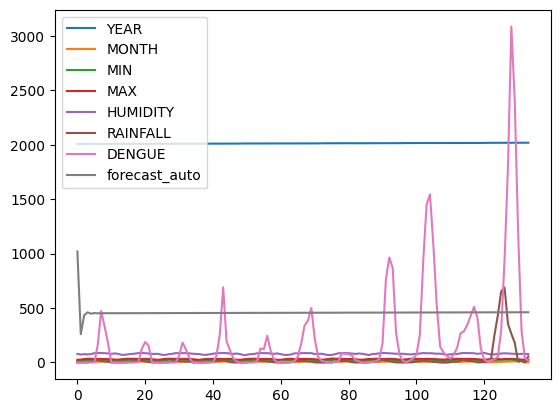

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(df))
df['forecast_auto'] = forecast_test_auto[:len(df)]
df.plot()

In [ ]:
# Import the necessary libraries
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Load data into the DataFrame
df = pd.read_csv("/content/DengueAndClimateBangladesh.csv")

# Fit the auto_arima model
auto_arima = pm.auto_arima(df.values.ravel(), stepwise=False, seasonal=False)

# Predict the values
forecast_auto = auto_arima.predict(n_periods=len(df))

# Calculate the performance metrics
mae = mean_absolute_error(df['DENGUE'], forecast_auto)
mape = mean_absolute_percentage_error(df['DENGUE'], forecast_auto)
rmse = np.sqrt(mean_squared_error(df['DENGUE'], forecast_auto))

# Print the results
print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 425.7393468425392
mape - auto: 5.616646466190959e+17
rmse - auto: 516.0460867046597


In [ ]:
mae = mean_absolute_error(df.iloc[:, 0], forecast_test_auto)
mape = mean_absolute_percentage_error(df.iloc[:, 0], forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df.iloc[:, 0], forecast_test_auto))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 1553.6759939323015
mape - manual: 0.771785025068796
rmse - manual: 1554.5381002810145


**T2**
https://medium.com/@ozdogar/time-series-forecasting-using-sarima-python-8db28f1d8cfc

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

The values in the forecast.predicted_mean output represent the predicted average number of dengue cases per month for the next 12 months, along with the 95% confidence intervals.

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, df['DENGUE'], test_size=0.2)

# Fit the SARIMAX model to the training data
model = SARIMAX(y_train, order=(3, 1, 4), seasonal_order=(1, 0, 2, 12))
result = model.fit()

# Predict the values for the whole dataset
predictions = result.predict(start=0, end=len(df) - 1)

# Print the predictions
print(predictions)

0         0.000000
1       287.807712
2      1188.406959
3      1016.665325
4       731.370548
          ...     
129     200.486851
130     191.579192
131     284.785721
132     224.377163
133     169.696425
Name: predicted_mean, Length: 134, dtype: float64


**The R² value is a statistical measure that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, where 1 indicates perfect fit and 0 indicates no fit.**

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Load your data into a Pandas DataFrame
data = pd.read_csv("/content/DengueAndClimateBangladesh.csv")

# Define the target variable
target_variable = "DENGUE"

# Split the data into training and test sets
train_data = df.copy()

# Fit the SARIMAX model
model = SARIMAX(train_data[target_variable], order=(2, 1, 3), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Make predictions on the entire train_data set
predictions = results.predict(start=0, end=len(train_data) - 1)

# Calculate the R² score
r2_score_value = r2_score(train_data[target_variable], predictions)

# Print the R² score
print("R² score:", r2_score_value)

R² score: 0.8444021823839278


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Load your data into a Pandas DataFrame
data = pd.read_csv("/content/DengueAndClimateBangladesh.csv")

# Define the target variable
target_variable = "DENGUE"

# Split the data into training and test sets
train_data = df.copy()

# Fit the SARIMAX model with the specified order
model = SARIMAX(train_data[target_variable], order=(3, 1, 4), seasonal_order=(1, 0, 2, 12))
results = model.fit()

# Make predictions on the entire train_data set
predictions = results.predict(start=0, end=len(train_data) - 1)

# Calculate the R² score
r2_score_value = r2_score(train_data[target_variable], predictions)

# Print the R² score
print("R² score:", r2_score_value)

R² score: 0.8648484570741903


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Load your data into a Pandas DataFrame
data = pd.read_csv("/content/DengueAndClimateBangladesh.csv")

# Define the target variable
target_variable = "DENGUE"

# Split the data into training and test sets
train_data = df.copy()

# Fit the SARIMAX model with the specified order
model = SARIMAX(train_data[target_variable], order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Make predictions on the entire train_data set
predictions = results.predict(start=0, end=len(train_data) - 1)

# Calculate the R² score
r2_score_value = r2_score(train_data[target_variable], predictions)

# Print the R² score
print("R² score:", r2_score_value)

R² score: 0.8234104429798773


**An R² score of 0.8444021823839278 means that approximately 84.44% of the variance in DENGUE can be explained by the SARIMAX model. This is a relatively high R² score, indicating that the model is a good fit for the data.**

**help from colab**

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Get the residuals from the SARIMAX model
residuals = result.resid

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[1])

# Print the Ljung-Box statistic and p-value
print("Ljung-Box (L1) statistic (Q):", lb_test.iloc[0, 0])
print("p-value:", lb_test.iloc[0, 1])

Ljung-Box (L1) statistic (Q): 0.007888794468929266
p-value: 0.9292258483374202


the Ljung-Box test at lag 1 does not show significant autocorrelation in the residuals is a positive indication that the model is capturing the dependencies in the data well.

**Analyzing  AIC & BIC**

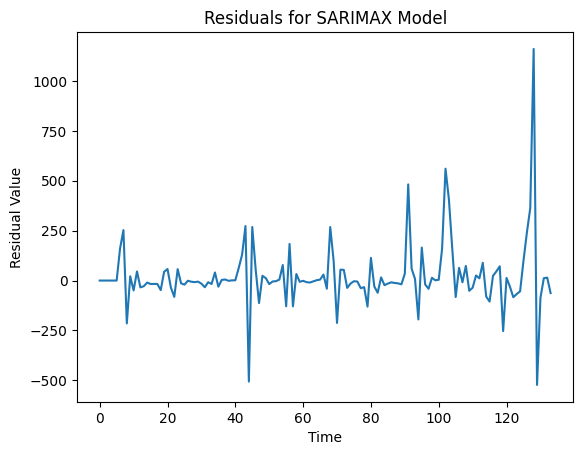

AIC: 1769.4670088853363
BIC: 1801.2608492957756


In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm

# Load the data
df = pd.read_csv('/content/DengueAndClimateBangladesh.csv')

# Define the SARIMAX model
model = sm.tsa.statespace.SARIMAX(df['DENGUE'],
                               order=(3, 1, 4),
                               seasonal_order=(1, 0, 2, 12))

# Fit the model
results = model.fit()

# Get the residuals
residuals = results.resid

# Plot the residuals
plt.plot(residuals)
plt.title('Residuals for SARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.show()

# Get the AIC value
aic = results.aic

# Print the AIC value
print('AIC:', aic)
# Get the BIC value
bic = results.bic

# Print the BIC value
print('BIC:', bic)

**Sensitivity Analysis**

In [ ]:
# Perform sensitivity analysis by varying the model order and seasonal order
orders = [(1, 1, 2), (2, 1, 3), (3, 1, 4)]
seasonal_orders = [(0, 0, 1, 12), (1, 0, 1, 12), (1, 0, 2, 12)]

for order in orders:
    for seasonal_order in seasonal_orders:
        # Define the model with the current order and seasonal order
        model = sm.tsa.statespace.SARIMAX(df['DENGUE'],
                                       order=order,
                                       seasonal_order=seasonal_order)

        # Fit the model
        results = model.fit()

        # Print the model summary
        print(f'Order: {order}, Seasonal Order: {seasonal_order}')
        print(results.summary())

Order: (1, 1, 2), Seasonal Order: (0, 0, 1, 12)
                                      SARIMAX Results                                       
Dep. Variable:                               DENGUE   No. Observations:                  134
Model:             SARIMAX(1, 1, 2)x(0, 0, [1], 12)   Log Likelihood                -899.315
Date:                              Fri, 05 Jul 2024   AIC                           1808.630
Time:                                      14:47:35   BIC                           1823.081
Sample:                                           0   HQIC                          1814.502
                                              - 134                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7452      0.084      8.843      0

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Load the data
df = pd.read_csv('/content/DengueAndClimateBangladesh.csv')

# Define the SARIMAX model orders and seasonal orders to try
orders = [(1, 1, 2), (2, 1, 3), (3, 1, 4)]
seasonal_orders = [(0, 0, 1, 12), (1, 0, 1, 12), (1, 0, 2, 12)]

# Iterate over the different orders and seasonal orders
for order in orders:
    for seasonal_order in seasonal_orders:
        # Define the model with the current order and seasonal order
        model = SARIMAX(df['DENGUE'], order=order, seasonal_order=seasonal_order)

        # Fit the model
        results = model.fit()

        # Make predictions on the entire dataset
        predictions = results.predict(start=0, end=len(df) - 1)

        # Calculate the performance metrics
        mae = mean_absolute_error(df['DENGUE'], predictions)
        mape = mean_absolute_percentage_error(df['DENGUE'], predictions)
        rmse = mean_squared_error(df['DENGUE'], predictions, squared=False)  # Set squared=False for RMSE

        # Print the results
        print(f'Order: {order}, Seasonal Order: {seasonal_order}')
        print(f'MAE: {mae}')
        print(f'MAPE: {mape}')
        print(f'RMSE: {rmse}')
        print('---')

Order: (1, 1, 2), Seasonal Order: (0, 0, 1, 12)
MAE: 104.79120306577241
MAPE: 2.67194363012644e+16
RMSE: 207.04013902167193
---
Order: (1, 1, 2), Seasonal Order: (1, 0, 1, 12)
MAE: 93.69498334427719
MAPE: 1.791407280291762e+16
RMSE: 188.90309771920758
---
Order: (1, 1, 2), Seasonal Order: (1, 0, 2, 12)
MAE: 85.67009738073934
MAPE: 1.7037370095842608e+16
RMSE: 172.7322382016312
---
Order: (2, 1, 3), Seasonal Order: (0, 0, 1, 12)
MAE: 94.12456108386657
MAPE: 2.4002921506408676e+16
RMSE: 186.4392193596679
---
Order: (2, 1, 3), Seasonal Order: (1, 0, 1, 12)
MAE: 87.47549349926277
MAPE: 1.8928168729113984e+16
RMSE: 177.32024466498882
---
Order: (2, 1, 3), Seasonal Order: (1, 0, 2, 12)
MAE: 82.13269109739878
MAPE: 1.828041025162978e+16
RMSE: 165.19467902374248
---
Order: (3, 1, 4), Seasonal Order: (0, 0, 1, 12)
MAE: 95.10029353557768
MAPE: 2.598696742123902e+16
RMSE: 180.4685124784991
---
Order: (3, 1, 4), Seasonal Order: (1, 0, 1, 12)
MAE: 89.83576194610536
MAPE: 2.253452478446985e+16
RMSE:

In [ ]:
# Fit the SARIMAX model to the entire dataset
model = SARIMAX(df['DENGUE'], order=(3, 1, 4), seasonal_order=(1, 0, 2, 12))
result = model.fit()

# Forecast for the next 12 months (2024)
forecast = result.get_forecast(steps=12)

# Extract the predicted mean values and confidence intervals
predicted_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Print the forecasted values
print(predicted_mean)
print(confidence_intervals)

134     127.764013
135     264.785568
136     383.971957
137     533.757800
138     764.458107
139    1005.384481
140    1061.983967
141     942.651816
142     705.769791
143     489.178128
144     443.023751
145     433.057123
Name: predicted_mean, dtype: float64
     lower DENGUE  upper DENGUE
134   -204.607893    460.135919
135   -268.993035    798.564171
136   -247.494965   1015.438878
137   -117.515455   1185.031054
138    112.743699   1416.172515
139    352.888509   1657.880453
140    408.296643   1715.671290
141    288.530038   1596.773594
142     51.641699   1359.897883
143   -164.936658   1143.292914
144   -211.149900   1097.197401
145   -221.218297   1087.332543


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# Fit the SARIMAX model
model = SARIMAX(df['DENGUE'], order=(3, 1, 4), seasonal_order=(1, 0, 2, 12))
result = model.fit()

# Get the p-values for the AR and MA coefficients
p_values = result.pvalues[1:]  # Exclude the constant term

# Print the p-values
for i, p_value in enumerate(p_values):
    print(f"Coefficient {i+1} p-value: {p_value}")

Coefficient 1 p-value: 0.4166694065629911
Coefficient 2 p-value: 0.6158897060082701
Coefficient 3 p-value: 0.13970591007346483
Coefficient 4 p-value: 0.7116889914707645
Coefficient 5 p-value: 0.8442648506337432
Coefficient 6 p-value: 0.6086872090632933
Coefficient 7 p-value: 0.0006294140182101488
Coefficient 8 p-value: 0.0011629473512625586
Coefficient 9 p-value: 0.0030178245594582463
Coefficient 10 p-value: 9.576249092183019e-05


In [ ]:
# Fit the SARIMAX model to the entire dataset
model = SARIMAX(df['DENGUE'], order=(3, 1, 4), seasonal_order=(1, 0, 2, 12))
result = model.fit()

# Forecast for the next 12 months (2024)
forecast = result.get_forecast(steps=12)

# Extract the predicted mean values
predicted_mean = forecast.predicted_mean

# Calculate the overall trend
trend = predicted_mean.mean() - df['DENGUE'].iloc[-1]

# Print the trend
if trend > 0:
    print(f"The model predicts a rise in dengue fever cases during 2024 with an average increase of {trend:.2f} cases.")
elif trend < 0:
    print(f"The model predicts a decrease in dengue fever cases during 2024 with an average decrease of {trend:.2f} cases.")
else:
    print("The model predicts no significant change in dengue fever cases during 2024.")

The model predicts a rise in dengue fever cases during 2024 with an average increase of 578.32 cases.


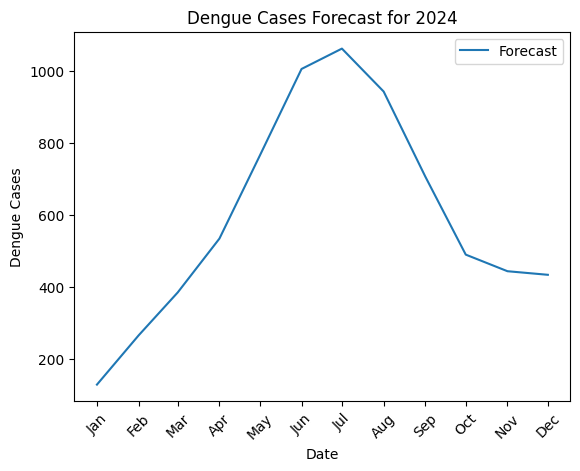

In [ ]:
# Fit the SARIMAX model to the training data
model = SARIMAX(df['DENGUE'], order=(3, 1, 4), seasonal_order=(1, 0, 2, 12))
result = model.fit()

# Predict the values for 2024 (assuming data ends in 2023)
forecast = result.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean

# Create a date range for 2024
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='MS')

# Plot the forecast
plt.plot(dates, forecast_mean, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')
plt.title('Dengue Cases Forecast for 2024')
plt.xticks(dates, [date.strftime('%b') for date in dates], rotation=45)  # Format x-axis labels as month abbreviations
plt.legend()
plt.show()

In [ ]:
# Find the highest predicted dengue case
highest_case = forecast_mean.max()
print(highest_case)

1061.9839666598627
